<a href="https://colab.research.google.com/github/zaforcan/urban-sounds-classification/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# https://drive.google.com/drive/folders/1agb47kRjuWtyffxMD6JQ4WmO0ImSuulm?usp=sharing

# Bu linkteki dataset klasörünü kendi google drive'ınıza kısayol olarak ekleyebilirsiniz

In [ ]:
#Veri setlerinin yüklenmesi

X_train = np.load("/content/drive/MyDrive/dataset/X_train.npy")
y_train = np.load("/content/drive/MyDrive/dataset/y_train.npy")
X_val = np.load("/content/drive/MyDrive/dataset/X_val.npy")
y_val = np.load("/content/drive/MyDrive/dataset/y_val.npy")
X_test = np.load("/content/drive/MyDrive/dataset/X_test.npy")
y_test = np.load("/content/drive/MyDrive/dataset/y_test.npy")

In [ ]:
#model 

model = tf.keras.Sequential()

In [ ]:
#input layer

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu", input_shape=(32,32,1)))

model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [ ]:
#Conv Layer

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu"))

In [ ]:
#Flatten 

model.add(tf.keras.layers.Flatten())

In [ ]:
#Dense 

model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

In [ ]:
#Output Layer

model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
results = model.fit(X_train, y_train, batch_size=128, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
55/55 [==============================] - 14s 234ms/step - loss: 2.1253 - accuracy: 0.2052 - val_loss: 1.7438 - val_accuracy: 0.4032
Epoch 2/50
55/55 [==============================] - 13s 229ms/step - loss: 1.8114 - accuracy: 0.3304 - val_loss: 1.5310 - val_accuracy: 0.4559
Epoch 3/50
55/55 [==============================] - 13s 229ms/step - loss: 1.6226 - accuracy: 0.4200 - val_loss: 1.2932 - val_accuracy: 0.5464
Epoch 4/50
55/55 [==============================] - 12s 227ms/step - loss: 1.4859 - accuracy: 0.4763 - val_loss: 1.2361 - val_accuracy: 0.5762
Epoch 5/50
55/55 [==============================] - 13s 229ms/step - loss: 1.3903 - accuracy: 0.5094 - val_loss: 1.1366 - val_accuracy: 0.6357
Epoch 6/50
55/55 [==============================] - 12s 227ms/step - loss: 1.3012 - accuracy: 0.5460 - val_loss: 0.9940 - val_accuracy: 0.6735
Epoch 7/50
55/55 [==============================] - 13s 228ms/step - loss: 1.1999 - accuracy: 0.5679 - val_loss: 0.9675 - val_accuracy: 0.6724

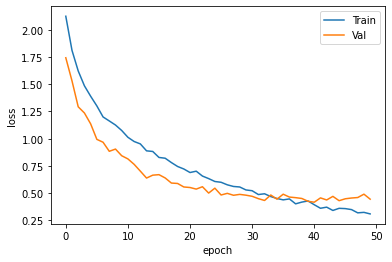

In [ ]:
# Plot the the training loss

plt.plot(results.history["loss"], label = "Train")

# Plot the the validation loss

plt.plot(results.history["val_loss"], label = "Val")

# Name the x and y axises
plt.ylabel("loss")
plt.xlabel("epoch")


# Put legend table
plt.legend()


# Show the plot

plt.show()

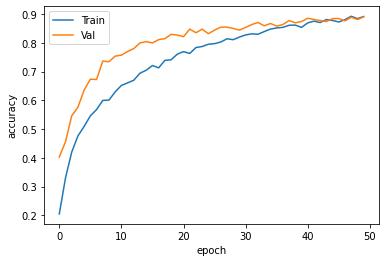

In [ ]:
# Plot the the training loss

plt.plot(results.history["accuracy"], label = "Train")

# Plot the the validation loss

plt.plot(results.history["val_accuracy"], label = "Val")

# Name the x and y axises
plt.ylabel("accuracy")
plt.xlabel("epoch")


# Put legend table
plt.legend()


# Show the plot

plt.show()

In [ ]:
# Evaluate the performance

test_result = model.test_on_batch(X_test, y_test)

print(test_result)
# Print the result


[0.5302786827087402, 0.8672769069671631]


In [ ]:
model.evaluate(X_test, y_test)

28/28 [==============================] - 0s 17ms/step - loss: 0.5303 - accuracy: 0.8673


[0.5302786827087402, 0.8672769069671631]

In [ ]:
for i in range(len(X_test)-1):
  prediction_result = model.predict(X_test[i].reshape(1,32,32,1))
  if y_test[i] == prediction_result.argmax():
    Sonuc = "Doğru"
  else:
    Sonuc = "Yanlış"

  print(f"Gerçek sınıf: {y_test[i]}, Tahmin edilen sınıf: {prediction_result.argmax()}, Sonuç: {Sonuc}")

Gerçek sınıf: 3, Tahmin edilen sınıf: 3, Sonuç: Doğru
Gerçek sınıf: 4, Tahmin edilen sınıf: 4, Sonuç: Doğru
Gerçek sınıf: 0, Tahmin edilen sınıf: 0, Sonuç: Doğru
Gerçek sınıf: 0, Tahmin edilen sınıf: 0, Sonuç: Doğru
Gerçek sınıf: 3, Tahmin edilen sınıf: 3, Sonuç: Doğru
Gerçek sınıf: 1, Tahmin edilen sınıf: 1, Sonuç: Doğru
Gerçek sınıf: 4, Tahmin edilen sınıf: 4, Sonuç: Doğru
Gerçek sınıf: 4, Tahmin edilen sınıf: 3, Sonuç: Yanlış
Gerçek sınıf: 0, Tahmin edilen sınıf: 0, Sonuç: Doğru
Gerçek sınıf: 3, Tahmin edilen sınıf: 3, Sonuç: Doğru
Gerçek sınıf: 2, Tahmin edilen sınıf: 3, Sonuç: Yanlış
Gerçek sınıf: 5, Tahmin edilen sınıf: 5, Sonuç: Doğru
Gerçek sınıf: 4, Tahmin edilen sınıf: 4, Sonuç: Doğru
Gerçek sınıf: 7, Tahmin edilen sınıf: 7, Sonuç: Doğru
Gerçek sınıf: 6, Tahmin edilen sınıf: 6, Sonuç: Doğru
Gerçek sınıf: 5, Tahmin edilen sınıf: 5, Sonuç: Doğru
Gerçek sınıf: 9, Tahmin edilen sınıf: 9, Sonuç: Doğru
Gerçek sınıf: 4, Tahmin edilen sınıf: 4, Sonuç: Doğru
Gerçek sınıf: 9, Tahmin ed